In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing('E:\python_work\handson_ml\datasets')

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)),housing.data]

In [6]:
m,n

(20640, 8)

In [7]:
X = tf.constant(housing_data_plus_bias,dtype=tf.float32,name='X')
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name='y')
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

with tf.Session() as sess:
    theta_value = theta.eval()

In [8]:
theta_value

array([[ -3.74651413e+01],
       [  4.35734153e-01],
       [  9.33829229e-03],
       [ -1.06622010e-01],
       [  6.44106984e-01],
       [ -4.25131839e-06],
       [ -3.77322501e-03],
       [ -4.26648885e-01],
       [ -4.40514028e-01]], dtype=float32)

compare with pure Numpy

In [9]:
X = housing_data_plus_bias
y = housing.target.reshape(-1,1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta_numpy)

[[ -3.69419202e+01]
 [  4.36693293e-01]
 [  9.43577803e-03]
 [ -1.07322041e-01]
 [  6.45065694e-01]
 [ -3.97638942e-06]
 [ -3.78654265e-03]
 [ -4.21314378e-01]
 [ -4.34513755e-01]]


compare with Scikit-Learn

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data,housing.target.reshape(-1,1))

print(np.r_[lin_reg.intercept_.reshape(-1,1),lin_reg.coef_.T])

[[ -3.69419202e+01]
 [  4.36693293e-01]
 [  9.43577803e-03]
 [ -1.07322041e-01]
 [  6.45065694e-01]
 [ -3.97638942e-06]
 [ -3.78654265e-03]
 [ -4.21314378e-01]
 [ -4.34513755e-01]]


# Using Batch Gradient Descent

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m,1)),scaled_housing_data]


In [12]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[  1.00000000e+00   6.60969987e-17   5.50808322e-18   6.60969987e-17
  -1.06030602e-16  -1.10161664e-17   3.44255201e-18  -1.07958431e-15
  -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ..., -0.06612179 -0.06360587
  0.01359031]
0.111111111111
(20640, 9)


# Manually computing the gradients

In [13]:
n_epochs = 1000
learning_rate = 0.1

X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,name='X')
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name='y')
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name='mse')
gradients = 2/m * tf.matmul(tf.transpose(X),error)
training_op = tf.assign(theta,theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 ==0 :
            print('Epoch',epoch,'MSE',mse.eval())
            sess.run(training_op)
            
    best_theta = theta.eval()


Epoch 0 MSE 2.75443
Epoch 100 MSE 1.95755
Epoch 200 MSE 1.4658
Epoch 300 MSE 1.1569
Epoch 400 MSE 0.960202
Epoch 500 MSE 0.833517
Epoch 600 MSE 0.751058
Epoch 700 MSE 0.696795
Epoch 800 MSE 0.660644
Epoch 900 MSE 0.636207


In [14]:
best_theta

array([[ 1.94357312],
       [ 0.61915338],
       [ 0.2657519 ],
       [ 0.30364925],
       [-0.21302894],
       [ 0.10283596],
       [-0.11213808],
       [-0.63850844],
       [-0.57460076]], dtype=float32)

# Using autodiff

In [16]:
n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,name='X')
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name='y')
theta = tf.Variable(tf.random_uniform([n+1,1],-1,1,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name='mse')

In [18]:
gradients = tf.gradients(mse,[theta])[0]

In [20]:
training_op = tf.assign(theta,theta - learning_rate * gradients)

init = tf. global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch',epoch,'MSE',mse.eval())
        sess.run(training_op)
        
    best_theta = theta.eval()

Epoch 0 MSE 2.75443
Epoch 100 MSE 0.632222
Epoch 200 MSE 0.57278
Epoch 300 MSE 0.558501
Epoch 400 MSE 0.549069
Epoch 500 MSE 0.542288
Epoch 600 MSE 0.537379
Epoch 700 MSE 0.533822
Epoch 800 MSE 0.531243
Epoch 900 MSE 0.529371


In [21]:
print('Best theta:')
print(best_theta)

Best theta:
[[  2.06855249e+00]
 [  7.74078071e-01]
 [  1.31192386e-01]
 [ -1.17845066e-01]
 [  1.64778143e-01]
 [  7.44078017e-04]
 [ -3.91945094e-02]
 [ -8.61356676e-01]
 [ -8.23479772e-01]]


In [22]:

def my_func(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z

In [23]:
my_func(0.2,0.3)

-0.21253923284754914

In [24]:
a = tf.Variable(0.2, name="a")
b = tf.Variable(0.3, name="b")
z = tf.constant(0.0, name="z0")
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)

grads = tf.gradients(z, [a, b])
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    init.run()
    print(z.eval())
    print(sess.run(grads))

-0.212537
[-1.1388494, 0.19671395]


Using a GradientDescentOptimizer

In [26]:
n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [29]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 2.75443
Epoch 100 MSE = 0.632222
Epoch 200 MSE = 0.57278
Epoch 300 MSE = 0.558501
Epoch 400 MSE = 0.549069
Epoch 500 MSE = 0.542288
Epoch 600 MSE = 0.537379
Epoch 700 MSE = 0.533822
Epoch 800 MSE = 0.531243
Epoch 900 MSE = 0.529371
Best theta:
[[  2.06855249e+00]
 [  7.74078071e-01]
 [  1.31192386e-01]
 [ -1.17845066e-01]
 [  1.64778143e-01]
 [  7.44078017e-04]
 [ -3.91945094e-02]
 [ -8.61356676e-01]
 [ -8.23479772e-01]]


Using a momentum optimizer

In [30]:
n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [31]:

optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)

In [32]:
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Best theta:
[[ 2.06855798]
 [ 0.82961673]
 [ 0.11875112]
 [-0.26552212]
 [ 0.30569226]
 [-0.00450316]
 [-0.03932616]
 [-0.89989167]
 [-0.87054664]]


# Feeding data to the training algorithm

In [35]:
A = tf.placeholder(tf.float32,shape=(None,3))
B = A +5
with tf.Session() as sess:
    B_val_1  = B.eval(feed_dict={A: [[1,2,3]]})
    B_val_2 = B.eval(feed_dict={A:[[4,5,6],[7,8,9]]})
    
print(B_val_1)

[[ 6.  7.  8.]]


In [36]:
print(B_val_2)

[[  9.  10.  11.]
 [ 12.  13.  14.]]


Mini-batch Gradient Descent

In [37]:
n_epochs = 1000
learning_rate = 0.01

In [38]:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [39]:

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [42]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m/batch_size))

In [43]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown 
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

In [44]:
best_theta

array([[ 2.07001591],
       [ 0.82045609],
       [ 0.1173173 ],
       [-0.22739051],
       [ 0.31134021],
       [ 0.00353193],
       [-0.01126994],
       [-0.91643935],
       [-0.87950081]], dtype=float32)

# Saving and restoring a model

In [45]:
n_epochs = 1000                                                                       # not shown in the book
learning_rate = 0.01                                                                  # not shown

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # not shown
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # not shown
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # not shown
error = y_pred - y                                                                    # not shown
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # not shown
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # not shown
training_op = optimizer.minimize(mse)                                                 # not shown

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())                                # not shown
            save_path = saver.save(sess, "E:/python_work/handson_ml/tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "E:/python_work/handson_ml/tmp/my_model_final.ckpt")

Epoch 0 MSE = 2.75443
Epoch 100 MSE = 0.632222
Epoch 200 MSE = 0.57278
Epoch 300 MSE = 0.558501
Epoch 400 MSE = 0.549069
Epoch 500 MSE = 0.542288
Epoch 600 MSE = 0.537379
Epoch 700 MSE = 0.533822
Epoch 800 MSE = 0.531243
Epoch 900 MSE = 0.529371


In [46]:
best_theta

array([[  2.06855249e+00],
       [  7.74078071e-01],
       [  1.31192386e-01],
       [ -1.17845066e-01],
       [  1.64778143e-01],
       [  7.44078017e-04],
       [ -3.91945094e-02],
       [ -8.61356676e-01],
       [ -8.23479772e-01]], dtype=float32)

In [47]:
with tf.Session() as sess:
    saver.restore(sess,'E:/python_work/handson_ml/tmp/my_model_final.ckpt')
    best_theta_restore = theta.eval()

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tmp/my_model_final.ckpt


In [48]:
np.allclose(best_theta,best_theta_restore)

True

In [49]:
saver = tf.train.import_meta_graph("E:/python_work/handson_ml/tmp/my_model_final.ckpt.meta")  # this loads the graph structure
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # not shown in the book

with tf.Session() as sess:
    saver.restore(sess, "E:/python_work/handson_ml/tmp/my_model_final.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tmp/my_model_final.ckpt


In [50]:
np.allclose(best_theta, best_theta_restored)

False

In [51]:
 best_theta_restored

array([[ 0.90454292],
       [ 0.35481548],
       [ 0.59063649],
       [ 0.51156354],
       [-0.04808879],
       [ 0.26202965],
       [-0.62795925],
       [-0.77138448],
       [-0.32755637]], dtype=float32)

In [52]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


In [53]:
reset_graph()
# notice that we start with an empty graph.

saver = tf.train.import_meta_graph("E:/python_work/handson_ml/tmp/my_model_final.ckpt.meta")  # this loads the graph structure
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # not shown in the book

with tf.Session() as sess:
    saver.restore(sess,"E:/python_work/handson_ml/tmp/my_model_final.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tmp/my_model_final.ckpt


In [54]:
best_theta_restored

array([[ 0.90454292],
       [ 0.35481548],
       [ 0.59063649],
       [ 0.51156354],
       [-0.04808879],
       [ 0.26202965],
       [-0.62795925],
       [-0.77138448],
       [-0.32755637]], dtype=float32)

In [55]:
best_theta_restore

array([[  2.06855249e+00],
       [  7.74078071e-01],
       [  1.31192386e-01],
       [ -1.17845066e-01],
       [  1.64778143e-01],
       [  7.44078017e-04],
       [ -3.91945094e-02],
       [ -8.61356676e-01],
       [ -8.23479772e-01]], dtype=float32)

# Visualizing the graph

In [56]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [57]:
show_graph(tf.get_default_graph())

# Using TensorBoard

In [58]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "E:/python_work/handson_ml/tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [59]:
n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [60]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [61]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [62]:

with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()  

In [63]:
file_writer.close()

In [64]:
best_theta

array([[ 2.07033372],
       [ 0.86371452],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.80304712]], dtype=float32)

In [65]:
a =np.random.randint(100, size=batch_size) 

In [66]:
a.shape

(100,)

# Name scopes

In [67]:
reset_graph()
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "E:/python_work/handson_ml/tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

In [68]:
with tf.name_scope('loss') as scope:
    error = y_pred  - y
    mse = tf.reduce_mean(tf.square(error),name='mse')

In [69]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [70]:

n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()


In [71]:
file_writer.flush()
file_writer.close()
print('Best theta:')
print('best_theta')

Best theta:
best_theta


In [72]:
print('Best theta:')
print(best_theta)

Best theta:
[[ 2.07033372]
 [ 0.86371452]
 [ 0.12255151]
 [-0.31211874]
 [ 0.38510373]
 [ 0.00434168]
 [-0.01232954]
 [-0.83376896]
 [-0.80304712]]


In [73]:
print(error.op.name)

loss/sub


In [75]:
print(mse.op.name)


loss/mse


In [76]:
reset_graph()
a1 = tf.Variable(0, name="a")      # name == "a"
a2 = tf.Variable(0, name="a")      # name == "a_1"

with tf.name_scope("param"):       # name == "param"
    a3 = tf.Variable(0, name="a")  # name == "param/a"

with tf.name_scope("param"):       # name == "param_1"
    a4 = tf.Variable(0, name="a")  # name == "param_1/a"

for node in (a1, a2, a3, a4):
    print(node.op.name)

a
a_1
param/a
param_1/a


# Modularity

In [77]:

reset_graph()

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z1, 0., name="relu2")  # Oops, cut&paste error! Did you spot it?

output = tf.add(relu1, relu2, name="output")

In [78]:
reset_graph()

def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

In [80]:

file_writer = tf.summary.FileWriter("E:/python_work/handson_ml/tf_logs/relu1", tf.get_default_graph())

In [79]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")    # not shown
        b = tf.Variable(0.0, name="bias")                             # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                      # not shown
        return tf.maximum(z, 0., name="max")  

In [81]:

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("E:/python_work/handson_ml/tf_logs/relu2", tf.get_default_graph())
file_writer.close()

# Sharing Variables

In [82]:
reset_graph()

def relu(X,threshold):
    with tf.name_scope('relu'):
        w_shape = (int(X.get_shape()[1]),1)
        w = tf.Variable(tf.random_normal(w_shape),name='weights')
        b = tf.Variable(0.0,name='bias')
        z = tf.add(tf.matmul(X,w),b,name='z')
        return tf.maximum(z,threshold,name='max')
    
threshold = tf.Variable(0.0,name='threshold')
X = tf.placeholder(tf.float32,shape=(None,n_features),name='X')
relus = [relu(X,threshold) for i in range(5)]
output = tf.add_n(relus,name='output')

In [83]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"):
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, relu.threshold, name="max")

In [85]:
X = tf.placeholder(tf.float32,shape=(None,n_features),name='X')
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus,name='output')

In [88]:
reset_graph()

with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))

In [89]:
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()
    threshold = tf.get_variable("threshold")

In [90]:

reset_graph()

def relu(X):
    with tf.variable_scope("relu", reuse=True):
        threshold = tf.get_variable("threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus, name="output")

In [91]:
file_writer = tf.summary.FileWriter("E:/python_work/handson_ml/tf_logs/relu6", tf.get_default_graph())
file_writer.close()

In [92]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu"):
        threshold = tf.get_variable("threshold", shape=(), initializer=tf.constant_initializer(0.0))
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("", default_name="") as scope:
    first_relu = relu(X)     # create the shared variable
    scope.reuse_variables()  # then reuse it
    relus = [first_relu] + [relu(X) for i in range(4)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("E:/python_work/handson_ml/tf_logs/relu8", tf.get_default_graph())
file_writer.close()

In [93]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
    w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
    b = tf.Variable(0.0, name="bias")                           # not shown
    z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

In [94]:
file_writer = tf.summary.FileWriter("E:/python_work/handson_ml/tf_logs/relu9", tf.get_default_graph())
file_writer.close()

In [95]:
reset_graph()

with tf.variable_scope("my_scope"):
    x0 = tf.get_variable("x", shape=(), initializer=tf.constant_initializer(0.))
    x1 = tf.Variable(0., name="x")
    x2 = tf.Variable(0., name="x")

with tf.variable_scope("my_scope", reuse=True):
    x3 = tf.get_variable("x")
    x4 = tf.Variable(0., name="x")

with tf.variable_scope("", default_name="", reuse=True):
    x5 = tf.get_variable("my_scope/x")

print("x0:", x0.op.name)
print("x1:", x1.op.name)
print("x2:", x2.op.name)
print("x3:", x3.op.name)
print("x4:", x4.op.name)
print("x5:", x5.op.name)
print(x0 is x3 and x3 is x5)

x0: my_scope/x
x1: my_scope/x_1
x2: my_scope/x_2
x3: my_scope/x
x4: my_scope_1/x
x5: my_scope/x
True


In [96]:

reset_graph()

text = np.array("Do you want some café?".split())
text_tensor = tf.constant(text)

with tf.Session() as sess:
    print(text_tensor.eval())

[b'Do' b'you' b'want' b'some' b'caf\xc3\xa9?']


# Exercise

In [97]:
from sklearn.datasets import make_moons

m = 1000
X_moons,y_moons = make_moons(m,noise=0.1,random_state=42)

In [98]:
X_moons.shape

(1000, 2)

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

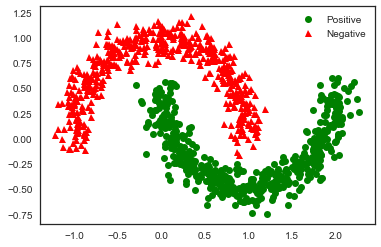

In [100]:
plt.plot(X_moons[y_moons==1,0],X_moons[y_moons==1,1],'go',label='Positive')
plt.plot(X_moons[y_moons==0,0],X_moons[y_moons==0,1],'r^',label='Negative')
plt.legend()
plt.show()

In [102]:
X_moons_with_bias = np.c_[np.ones((m,1)),X_moons]

In [103]:
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [105]:
y_moons_column_vector = y_moons.reshape(-1, 1)

In [106]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [107]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [108]:

X_batch, y_batch = random_batch(X_train, y_train, 5)
X_batch

array([[ 1.        ,  1.93189866,  0.13158788],
       [ 1.        ,  1.07172763,  0.13482039],
       [ 1.        , -1.01148674, -0.04686381],
       [ 1.        ,  0.02201868,  0.19079139],
       [ 1.        , -0.98941204,  0.02473116]])

In [109]:
y_batch

array([[1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [110]:
reset_graph()

In [111]:
n_inputs = 2

In [112]:

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = 1 / (1 + tf.exp(-logits))

In [113]:

y_proba = tf.sigmoid(logits)

In [114]:

epsilon = 1e-7  # to avoid an overflow when computing the log
loss = -tf.reduce_mean(y * tf.log(y_proba + epsilon) + (1 - y) * tf.log(1 - y_proba + epsilon))

In [115]:
loss = tf.losses.log_loss(y, y_proba)  # uses epsilon = 1e-7 by default

In [116]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [117]:
init = tf.global_variables_initializer()


In [118]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 0.792602
Epoch: 100 	Loss: 0.343463
Epoch: 200 	Loss: 0.30754
Epoch: 300 	Loss: 0.292889
Epoch: 400 	Loss: 0.285336
Epoch: 500 	Loss: 0.280478
Epoch: 600 	Loss: 0.278083
Epoch: 700 	Loss: 0.276154
Epoch: 800 	Loss: 0.27552
Epoch: 900 	Loss: 0.274912


In [119]:
y_proba_val[:5]


array([[ 0.54895616],
       [ 0.70724374],
       [ 0.51900256],
       [ 0.9911136 ],
       [ 0.50859052]], dtype=float32)

In [120]:

y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]], dtype=bool)

In [122]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred)

0.86274509803921573

In [123]:
recall_score(y_test,y_pred)

0.88888888888888884

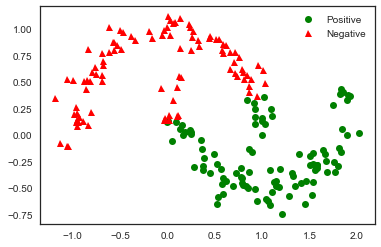

In [124]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

In [125]:

X_train_enhanced = np.c_[X_train,
                         np.square(X_train[:, 1]),
                         np.square(X_train[:, 2]),
                         X_train[:, 1] ** 3,
                         X_train[:, 2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]

In [126]:
X_train_enhanced[:5]

array([[  1.00000000e+00,  -5.14696757e-02,   4.44198631e-01,
          2.64912752e-03,   1.97312424e-01,  -1.36349734e-04,
          8.76459084e-02],
       [  1.00000000e+00,   1.03201691e+00,  -4.19741157e-01,
          1.06505890e+00,   1.76182639e-01,   1.09915879e+00,
         -7.39511049e-02],
       [  1.00000000e+00,   8.67891864e-01,  -2.54827114e-01,
          7.53236288e-01,   6.49368582e-02,   6.53727646e-01,
         -1.65476722e-02],
       [  1.00000000e+00,   2.88850997e-01,  -4.48668621e-01,
          8.34348982e-02,   2.01303531e-01,   2.41002535e-02,
         -9.03185778e-02],
       [  1.00000000e+00,  -8.33439108e-01,   5.35056649e-01,
          6.94620746e-01,   2.86285618e-01,  -5.78924095e-01,
          1.53179024e-01]])

In [127]:
reset_graph()

In [128]:
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [129]:
from datetime import datetime

def log_dir(prefix="E:/python_work/handson_ml/"):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        root_logdir +='tf_logs'
        #prefix += "-"
    name = "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [130]:
n_inputs = 2 + 4
logdir = log_dir()

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [132]:
import os
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "E:/python_work/handson_ml/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "E:/python_work/handson_ml/tf_logs/my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 0.629985
Epoch: 500 	Loss: 0.161224
Epoch: 1000 	Loss: 0.119032
Epoch: 1500 	Loss: 0.0973292
Epoch: 2000 	Loss: 0.0836979
Epoch: 2500 	Loss: 0.0743758
Epoch: 3000 	Loss: 0.0675021
Epoch: 3500 	Loss: 0.0622069
Epoch: 4000 	Loss: 0.0580268
Epoch: 4500 	Loss: 0.054563
Epoch: 5000 	Loss: 0.0517083
Epoch: 5500 	Loss: 0.0492377
Epoch: 6000 	Loss: 0.0471673
Epoch: 6500 	Loss: 0.0453766
Epoch: 7000 	Loss: 0.0438187
Epoch: 7500 	Loss: 0.0423742
Epoch: 8000 	Loss: 0.0410892
Epoch: 8500 	Loss: 0.0399709
Epoch: 9000 	Loss: 0.0389202
Epoch: 9500 	Loss: 0.0380107
Epoch: 10000 	Loss: 0.0371557


In [133]:
y_pred = (y_proba_val >=0.5)

In [134]:
precision_score(y_test,y_pred)

0.97979797979797978

In [135]:
recall_score(y_test,y_pred)

0.97979797979797978

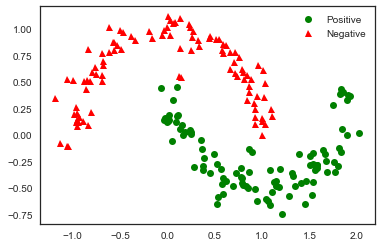

In [136]:

y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

In [ ]:
from scipy.stats import reciprocal

n_search_iterations = 10

for search_iteration in range(n_search_iterations):
    batch_size = np.random.randint(1, 100)
    learning_rate = reciprocal(0.0001, 0.1).rvs(random_state=search_iteration)

    n_inputs = 2 + 4
    logdir = log_dir("logreg")
    
    print("Iteration", search_iteration)
    print("  logdir:", logdir)
    print("  batch size:", batch_size)
    print("  learning_rate:", learning_rate)
    print("  training: ", end="")

    reset_graph()

    X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
    y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

    y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(
        X, y, learning_rate=learning_rate)

    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

    n_epochs = 10001
    n_batches = int(np.ceil(m / batch_size))

    final_model_path = "./my_logreg_model_%d" % search_iteration

    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epochs):
            for batch_index in range(n_batches):
                X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 500 == 0:
                print(".", end="")

        saver.save(sess, final_model_path)

        print()
        y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
        y_pred = (y_proba_val >= 0.5)
        
        print("  precision:", precision_score(y_test, y_pred))
        print("  recall:", recall_score(y_test, y_pred))